# C-12 DAS Data Python Project

In this example, we will read in a sample C-12 Data Acquisition System (DAS) file, extract the necessary data parameters, and produce a TPS-quality PDF figure that is ready for a test report. For this activity, we will be plotting the Phugoid response for a C-12.

First, we will import the C-12 data, which is formatted as a .csv file. Make sure the Example_C12.csv file is in the directory you are working in. My method is to import the pandas library to load the .csv data as a dataframe using pandas' `read_csv` function.

In [12]:
import pandas as pd
fileName = 'Example_C12.csv'
data = pd.read_csv(fileName);

In [13]:
print(data)

     Unnamed: 0            IRIG_TIME  Delta_Irig  ICU_EVNT_CNT  FMT_VER  \
0             0  322:21:47:51.000000      701.50             6        5   
1             1  322:21:47:54.150000      704.65             6        5   
2             2  322:21:47:57.300000      707.80             6        5   
3             3  322:21:48:00.450000      710.95             6        5   
4             4  322:21:48:03.600000      714.10             6        5   
5             5  322:21:48:06.750000      717.25             6        5   
6             6  322:21:48:09.900000      720.40             6        5   
7             7  322:21:48:13.050000      723.55             6        5   
8             8  322:21:48:16.200000      726.70             6        5   
9             9  322:21:48:19.350000      729.85             6        5   
10           10  322:21:48:22.500000      733.00             6        5   
11           11  322:21:48:25.650000      736.15             6        5   
12           12  322:21:4

The data we're after is the C-12's "Phugoid Mode" response, which is a decaying interchange between airspeed and altitude over a relatively long period of time (minutes) after having executed a "Pitch Doublet" manuever. We will now extract these parameters from the DAS data.

In [14]:
time = data.Delta_Irig.tolist()
altitude = data.ADC_ALT_29.tolist()
airspeed = airspeed = data.ADC_IAS.tolist()

We have now extracted time, altitude, amd airspeed for the entire mission, and we need to further extract the data from the window of interest, the Phugoid response, which is done using "Event Markers". The test conductor has informed us that the Phugoid FTT was executed between markers 7 and 8. We will now extract the event markers from the test using the "ICU_EVNT_COUNT" data stream.

In [15]:
eventName = data.ICU_EVNT_CNT.tolist()

We will now use the eventName series to extract the altitude and airspeed data for the Phugoid response of the C-12. First we will define an event vector.

In [16]:
myEvents = pd.Series(range(7,9))

The `range` function creates a sequence of integers, in this case from 7 to 9, not including the upper limit. `pd.Series` converts the sequence from class range to a series similar to the data we have already extracted. We can now find all of our data that has the Phugoid event markers using nested `for` loops. We will use a `for` loop to march through our data to find every instance with an event marker matching our event vector, which will be implemented in a `for` loop itself. For each instance where our desired event marker is found, we will write the correpsonding data to new lists using the `append` function. First, we must initialize the lists which can be done with `[]`. `time_ph`, `altitude_ph`, and `airspeed_ph` are the time, altitude, and airspeed data respectively from the Phugoid response of the C-12.

In [17]:
time_ph = []  # Initialize time vector
altitude_ph = []  # Initialize altitude vector
airspeed_ph = []  # Initialize airspeed vector
first = eventName.index(7)  # This finds the first occurrence of event 7
reversed_list = eventName[::-1]  # This reverses the eventName list
first_reversed = reversed_list.index(8)  # This finds the first occurrence of event 8 
# in the reversed list (the last occurrence of event 8 in our original list)
last = len(eventName)-1-first_reversed  # Convert the index of the reversed list to the 
# correpsonding index in the original
time_ph = time[first:last]  # Create our time list for the phugoid response
altitude_ph = altitude[first:last]  # Create altitude list for the phugoid response
airspeed_ph = airspeed[first:last]  # Create airspeed list for the phugoid response

In [18]:
time_ph = []
altitude_ph = []
airspeed_ph = []
for x in myEvents:
    for i,y in enumerate(eventName):
        if y == x:
            time_ph.append(time[i])
            altitude_ph.append(altitude[i])
            airspeed_ph.append(airspeed[i])

Now that we have the lists we want, we are ready to create our plots. We will use the `plt.subplots()` function to create our figure and our first axis. After we assign the desired properties to the first axis, we will create our second axis using the `twinx()` function.

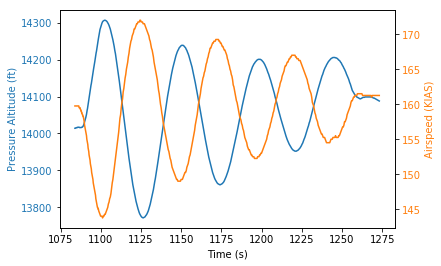

In [27]:
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots()  # creates figure, fig, and the first axis, ax1 

color = 'tab:blue'  # sets the color property we will use for ax1 
ax1.set_xlabel('Time (s)')  # set x label
ax1.set_ylabel('Pressure Altitude (ft)',color=color)  # set y-label, set label color to our color specified earlier
ax1.plot(time_ph,altitude_ph,color=color)  # plot the altitude data as a function of time, set color 
ax1.tick_params(axis='y',labelcolor=color)  # this changes the axis ticks to be the same color as our data

ax2 = ax1.twinx() # to create our second axis.

color = 'tab:orange'  # repeat the process of assigning properties for our second axis, changing the color
ax2.set_ylabel('Airspeed (KIAS)',color=color)
ax2.plot(time_ph,airspeed_ph,color=color)  # plot airspeed instead of altitude on the second axis
ax2.tick_params(axis='y',labelcolor=color)

plt.show()